In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import os
import re

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
devices = tf.config.list_physical_devices('GPU')
print(len(devices)) 

1


In [8]:
tf.random.set_seed(13)

#### create dataframe with image labels

In [49]:
path = "photos/original"

files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
print(files_list)
print(len(files_list))

['Alphabet_A_1.jpg', 'Alphabet_A_10.jpg', 'Alphabet_A_11.jpg', 'Alphabet_A_12.jpg', 'Alphabet_A_13.jpg', 'Alphabet_A_14.jpg', 'Alphabet_A_15.jpg', 'Alphabet_A_16.jpg', 'Alphabet_A_17.jpg', 'Alphabet_A_18.jpg', 'Alphabet_A_19.jpg', 'Alphabet_A_2.jpg', 'Alphabet_A_20.jpg', 'Alphabet_A_21.jpg', 'Alphabet_A_22.jpg', 'Alphabet_A_23.jpg', 'Alphabet_A_24.jpg', 'Alphabet_A_25.jpg', 'Alphabet_A_26.jpg', 'Alphabet_A_27.jpg', 'Alphabet_A_28.jpg', 'Alphabet_A_29.jpg', 'Alphabet_A_3.jpg', 'Alphabet_A_30.jpg', 'Alphabet_A_31.jpg', 'Alphabet_A_32.jpg', 'Alphabet_A_33.jpg', 'Alphabet_A_34.jpg', 'Alphabet_A_35.jpg', 'Alphabet_A_36.jpg', 'Alphabet_A_37.jpg', 'Alphabet_A_38.jpg', 'Alphabet_A_39.jpg', 'Alphabet_A_4.jpg', 'Alphabet_A_5.jpg', 'Alphabet_A_6.jpg', 'Alphabet_A_7.jpg', 'Alphabet_A_8.jpg', 'Alphabet_A_9.jpg', 'Alphabet_B_1.jpg', 'Alphabet_B_10.jpg', 'Alphabet_B_11.jpg', 'Alphabet_B_12.jpg', 'Alphabet_B_13.jpg', 'Alphabet_B_14.jpg', 'Alphabet_B_15.jpg', 'Alphabet_B_16.jpg', 'Alphabet_B_17.jpg', '

In [50]:
d = {"path": files_list}
img_df = pd.DataFrame(d)
img_df.head()

,path
0,Alphabet_A_1.jpg
1,Alphabet_A_10.jpg
2,Alphabet_A_11.jpg
3,Alphabet_A_12.jpg
4,Alphabet_A_13.jpg


In [51]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [52]:
img_df["class"] = img_df["path"].apply(lambda x: x.rsplit('_', 1)[0])
print(img_df["class"].unique())
print(len(img_df["class"].unique()))

['Alphabet_A' 'Alphabet_B' 'Alphabet_C' 'Alphabet_D' 'Alphabet_E'
 'Alphabet_F' 'Alphabet_G' 'Alphabet_H' 'Alphabet_S' 'Alphabet_T'
 'Alphabet_U' 'Alphabet_v' 'Alphabet_w' 'Alphabet_x' 'Alphabet_y'
 'Alphabet_z' 'Bullseye' 'down_arrow' 'eight' 'five' 'four' 'left_arrow'
 'nine' 'one' 'right_arrow' 'seven' 'six' 'Stop' 'three' 'two' 'up_arrow']
31


In [53]:
img_df["label"] = img_df["class"].apply(lambda x: classes.index(x))
img_df.head()

,path,class,label
0,Alphabet_A_1.jpg,Alphabet_A,9
1,Alphabet_A_10.jpg,Alphabet_A,9
2,Alphabet_A_11.jpg,Alphabet_A,9
3,Alphabet_A_12.jpg,Alphabet_A,9
4,Alphabet_A_13.jpg,Alphabet_A,9


In [54]:
img_df["image_id"] = img_df["label"].apply(lambda x: x+11)
img_df.head()

,path,class,label,image_id
0,Alphabet_A_1.jpg,Alphabet_A,9,20
1,Alphabet_A_10.jpg,Alphabet_A,9,20
2,Alphabet_A_11.jpg,Alphabet_A,9,20
3,Alphabet_A_12.jpg,Alphabet_A,9,20
4,Alphabet_A_13.jpg,Alphabet_A,9,20


In [55]:
img_df.to_csv("photos/image_labels.csv", index=False)

In [56]:
len(img_df)

1211

### Resize images

In [57]:
from PIL import Image

(new_width, new_height) = (128, 128)

path = "photos/original/"
filenames = img_df["path"]

for filename in filenames:
    with Image.open(f"{path}/{filename}") as im:
        width, height = im.size
        if height >= width:
            left = 0
            top = (height-width)/2
            right = width
            bottom = width+(height-width)/2
        else:
            left = (width-height)/2
            top = 0
            right = height+(width-height)/2
            bottom = height
        im_cropped = im.crop((left, top, right, bottom))
        im_resized = im_cropped.resize((new_width, new_height), resample=Image.HAMMING)
        im_resized.save(f"photos/resized/128/{filename}")

### Create dataset

In [58]:
img_df = pd.read_csv("photos/image_labels.csv")
print(len(img_df))
img_df.head()

1211


,path,class,label,image_id
0,Alphabet_A_1.jpg,Alphabet_A,9,20
1,Alphabet_A_10.jpg,Alphabet_A,9,20
2,Alphabet_A_11.jpg,Alphabet_A,9,20
3,Alphabet_A_12.jpg,Alphabet_A,9,20
4,Alphabet_A_13.jpg,Alphabet_A,9,20


In [59]:
filenames = img_df["path"]
labels = img_df["label"]
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [60]:
def decode_images(file):
  path = f"./photos/resized/128/{file}"
  print(path)
  image_decoded = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)/255
  im = tf.cast(image_decoded, tf.float32)
  return im

decoded_images = list(map(lambda file: decode_images(file), list(filenames)))

./photos/resized/128/Alphabet_A_1.jpg
./photos/resized/128/Alphabet_A_10.jpg
./photos/resized/128/Alphabet_A_11.jpg
./photos/resized/128/Alphabet_A_12.jpg
./photos/resized/128/Alphabet_A_13.jpg
./photos/resized/128/Alphabet_A_14.jpg
./photos/resized/128/Alphabet_A_15.jpg
./photos/resized/128/Alphabet_A_16.jpg
./photos/resized/128/Alphabet_A_17.jpg
./photos/resized/128/Alphabet_A_18.jpg
./photos/resized/128/Alphabet_A_19.jpg
./photos/resized/128/Alphabet_A_2.jpg
./photos/resized/128/Alphabet_A_20.jpg
./photos/resized/128/Alphabet_A_21.jpg
./photos/resized/128/Alphabet_A_22.jpg
./photos/resized/128/Alphabet_A_23.jpg
./photos/resized/128/Alphabet_A_24.jpg
./photos/resized/128/Alphabet_A_25.jpg
./photos/resized/128/Alphabet_A_26.jpg
./photos/resized/128/Alphabet_A_27.jpg
./photos/resized/128/Alphabet_A_28.jpg
./photos/resized/128/Alphabet_A_29.jpg
./photos/resized/128/Alphabet_A_3.jpg
./photos/resized/128/Alphabet_A_30.jpg
./photos/resized/128/Alphabet_A_31.jpg
./photos/resized/128/Alphabe

In [61]:
print(decoded_images[1])

tf.Tensor(
[[[0.7411765  0.6784314  0.6156863 ]
  [0.74509805 0.68235296 0.61960787]
  [0.7411765  0.6901961  0.62352943]
  ...
  [0.36078432 0.4        0.40392157]
  [0.35686275 0.39607844 0.4       ]
  [0.3529412  0.39215687 0.39607844]]

 [[0.7254902  0.6627451  0.6       ]
  [0.73333335 0.67058825 0.60784316]
  [0.7294118  0.6784314  0.6117647 ]
  ...
  [0.33333334 0.37254903 0.3764706 ]
  [0.32941177 0.36862746 0.37254903]
  [0.3254902  0.3647059  0.36862746]]

 [[0.7137255  0.6509804  0.5882353 ]
  [0.72156864 0.65882355 0.59607846]
  [0.72156864 0.67058825 0.6039216 ]
  ...
  [0.29411766 0.33333334 0.32941177]
  [0.2901961  0.32941177 0.3254902 ]
  [0.28627452 0.3254902  0.32156864]]

 ...

 [[0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0.33333334]
  ...
  [0.7372549  0.78039217 0.7254902 ]
  [0.7372549  0.78039217 0.7254902 ]
  [0.7372549  0.78039217 0.7254902 ]]

 [[0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0

In [62]:
labels = tf.constant(labels)

In [63]:
print(labels)

tf.Tensor([ 9  9  9 ... 25 25 25], shape=(1211,), dtype=int64)


In [64]:
dataset = tf.data.Dataset.from_tensor_slices((decoded_images, labels))

In [65]:
len(dataset)

1211

In [66]:
dataset = dataset.shuffle(1211)

In [67]:
dataset

<ShuffleDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Text(0.5, 1.0, 'right_arrow')

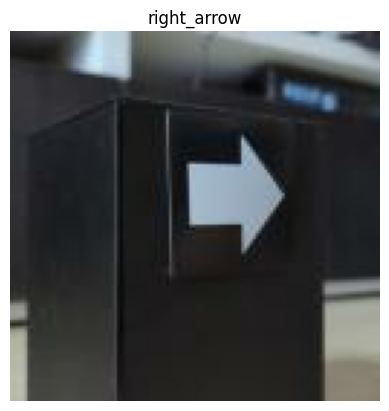

In [68]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.axis("off")
plt.title(classes[label])

In [69]:
path = "./datasets/original_128"

dataset.save(path)

### Data augmentation

In [70]:
path = "./datasets/original_128"

dataset = tf.data.Dataset.load(path)


In [71]:
len(dataset)

1211

In [72]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [73]:
data_augmentation = keras.Sequential(
  [
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'six')

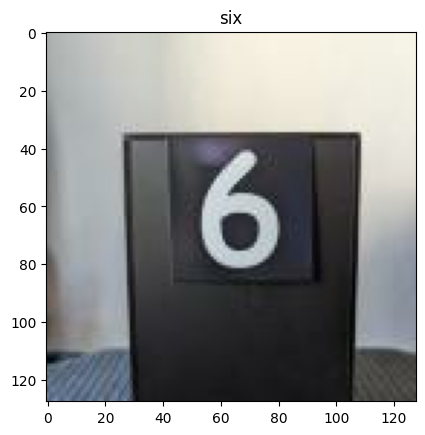

In [74]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.title(classes[label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


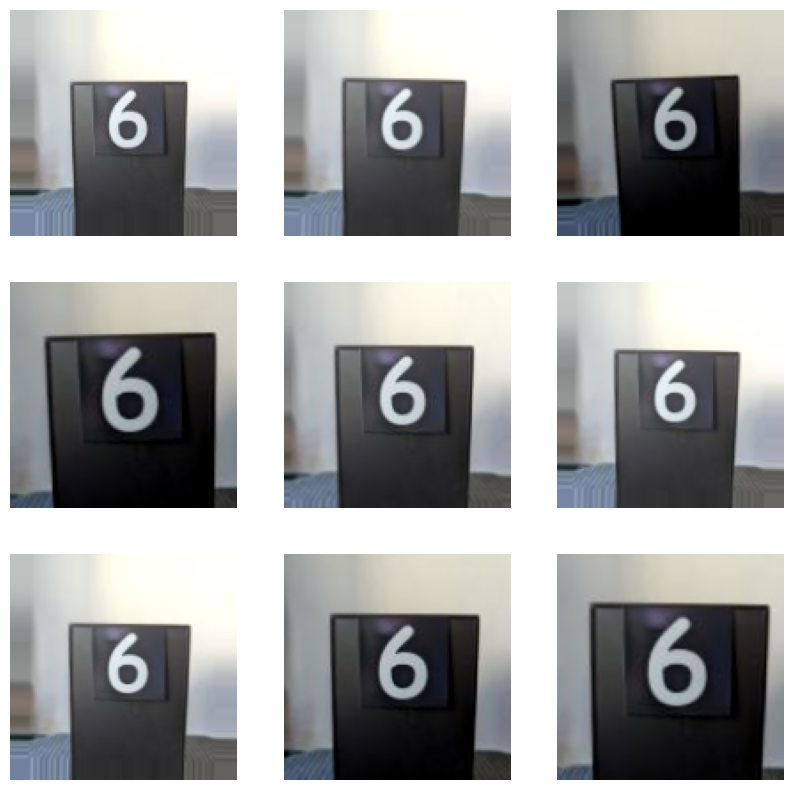

In [75]:
plt.figure(figsize=(10, 10))
for i in range(9):
  new_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

### Train-test-val split

In [9]:
path = "./datasets/original_128"

full_dataset = tf.data.Dataset.load(path)


In [10]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [11]:
len(full_dataset)

1211

In [12]:
val_size = test_size = int(0.15*len(full_dataset))
train_size = len(full_dataset) - val_size - test_size

train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

print(len(train_dataset), len(val_dataset), len(test_dataset))

849 181 181


In [13]:
#check if all datasets contain all classes
train_labels = []
for image, label in train_dataset:
    train_labels.append(int(label))

print(len(np.unique(train_labels)))

val_labels = []
for image, label in val_dataset:
    val_labels.append(int(label))

print(len(np.unique(val_labels)))

test_labels = []
for image, label in test_dataset:
    test_labels.append(int(label))

print(len(np.unique(test_labels)))

31
31
31


In [14]:
batch_size = 64

train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [15]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### CNN

In [12]:
img_shape = (128, 128, 3,)

In [16]:
data_augmentation = keras.Sequential(
  [
    keras.Input(shape=img_shape),
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'six')

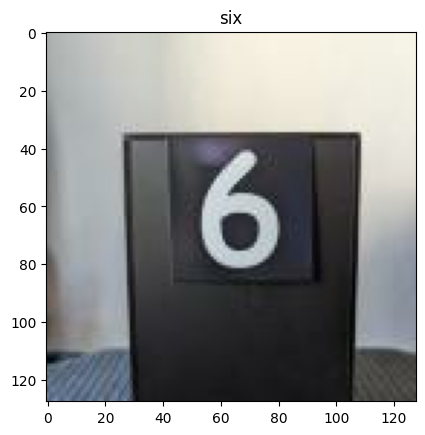

In [17]:
images, labels = next(iter(train_dataset))
plt.imshow(images[0])
plt.title(classes[labels[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


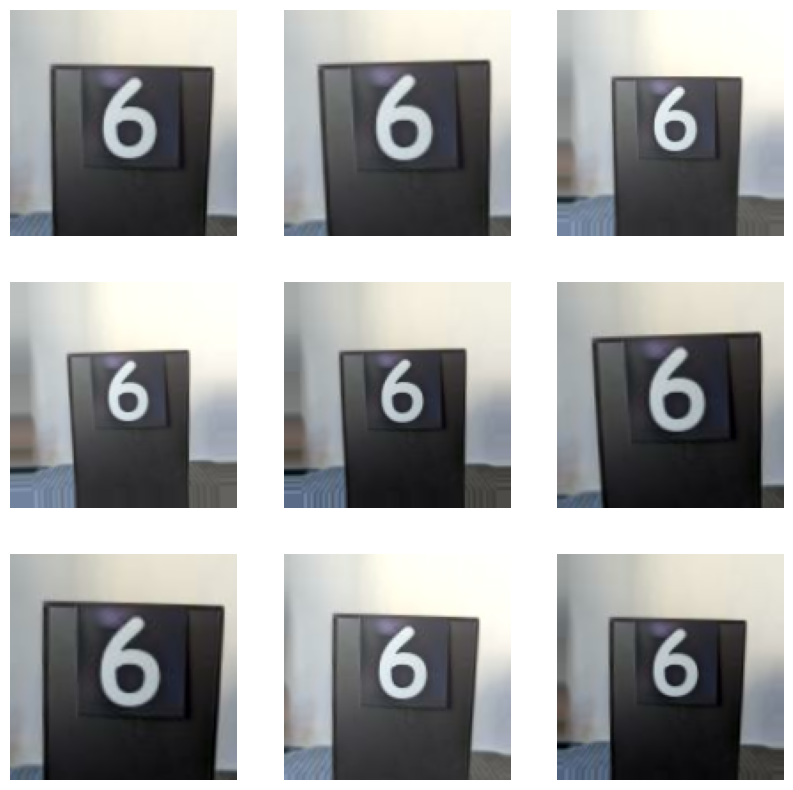

In [15]:
plt.figure(figsize=(10, 10))

for i in range(9):
  new_images = data_augmentation(images)
  new_image = new_images[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

In [18]:
cnn_model = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Conv2D(16, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(48, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [19]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [20]:
checkpoint_filepath = 'models/testing/cnn_model.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [21]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)      

In [23]:
epochs = 100

history = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100
14/14 [==============================] - 33s 1s/step - loss: 3.4428 - accuracy: 0.0424 - val_loss: 3.4373 - val_accuracy: 0.0442
Epoch 2/100
14/14 [==============================] - 13s 909ms/step - loss: 3.1981 - accuracy: 0.0848 - val_loss: 3.4396 - val_accuracy: 0.0331
Epoch 3/100
14/14 [==============================] - 12s 878ms/step - loss: 3.0453 - accuracy: 0.1461 - val_loss: 3.4450 - val_accuracy: 0.0331
Epoch 4/100
14/14 [==============================] - 12s 865ms/step - loss: 2.9236 - accuracy: 0.1649 - val_loss: 3.4505 - val_accuracy: 0.0331
Epoch 5/100
14/14 [==============================] - 13s 918ms/step - loss: 2.8351 - accuracy: 0.2132 - val_loss: 3.4532 - val_accuracy: 0.0331
Epoch 6/100
14/14 [==============================] - 13s 929ms/step - loss: 2.7487 - accuracy: 0.2049 - val_loss: 3.4576 - val_accuracy: 0.0331
Epoch 7/100
14/14 [==============================] - 14s 1000ms/step - loss: 2.6553 - accuracy: 0.2462 - val_loss: 3.4518 - val_accuracy: 0

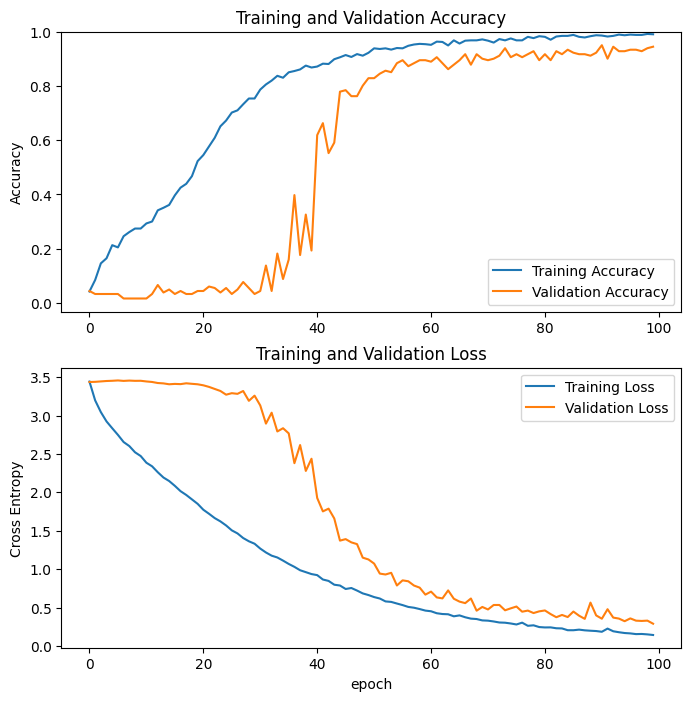

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [26]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [27]:
#train for another 25 epochs
epochs = 25

history1 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


14/14 [==============================] - 16s 913ms/step - loss: 0.1341 - accuracy: 0.9906 - val_loss: 0.2762 - val_accuracy: 0.9613
Epoch 2/25
14/14 [==============================] - 12s 873ms/step - loss: 0.1276 - accuracy: 0.9941 - val_loss: 0.2704 - val_accuracy: 0.9558
Epoch 3/25
14/14 [==============================] - 12s 882ms/step - loss: 0.1284 - accuracy: 0.9929 - val_loss: 0.2551 - val_accuracy: 0.9558
Epoch 4/25
14/14 [==============================] - 12s 883ms/step - loss: 0.1292 - accuracy: 0.9918 - val_loss: 0.2546 - val_accuracy: 0.9503
Epoch 5/25
14/14 [==============================] - 12s 846ms/step - loss: 0.1277 - accuracy: 0.9929 - val_loss: 0.2651 - val_accuracy: 0.9503
Epoch 6/25
14/14 [==============================] - 12s 849ms/step - loss: 0.1361 - accuracy: 0.9929 - val_loss: 0.2660 - val_accuracy: 0.9613
Epoch 7/25
14/14 [==============================] - 12s 833ms/step - loss: 0.1299 - accuracy: 0.9906 - val_loss: 0.2665 - val_accuracy: 0.9558
Epoch 8/25

In [28]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

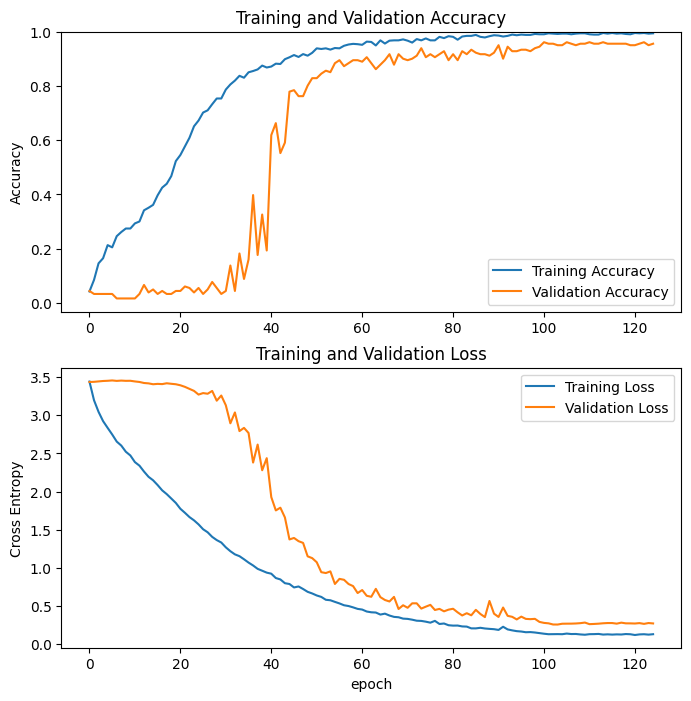

In [29]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00005, momentum=0.9)

In [31]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [32]:
#train for another 25 epochs
epochs = 25

history2 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


14/14 [==============================] - 16s 893ms/step - loss: 0.1260 - accuracy: 0.9918 - val_loss: 0.2688 - val_accuracy: 0.9558
Epoch 2/25
14/14 [==============================] - 12s 874ms/step - loss: 0.1250 - accuracy: 0.9953 - val_loss: 0.2720 - val_accuracy: 0.9558
Epoch 3/25
14/14 [==============================] - 12s 837ms/step - loss: 0.1239 - accuracy: 0.9941 - val_loss: 0.2679 - val_accuracy: 0.9558
Epoch 4/25
14/14 [==============================] - 13s 895ms/step - loss: 0.1277 - accuracy: 0.9918 - val_loss: 0.2662 - val_accuracy: 0.9558
Epoch 5/25
14/14 [==============================] - 12s 826ms/step - loss: 0.1264 - accuracy: 0.9941 - val_loss: 0.2670 - val_accuracy: 0.9448
Epoch 6/25
14/14 [==============================] - 12s 835ms/step - loss: 0.1300 - accuracy: 0.9906 - val_loss: 0.2617 - val_accuracy: 0.9503
Epoch 7/25
14/14 [==============================] - 12s 825ms/step - loss: 0.1269 - accuracy: 0.9906 - val_loss: 0.2744 - val_accuracy: 0.9558
Epoch 8/25

In [33]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

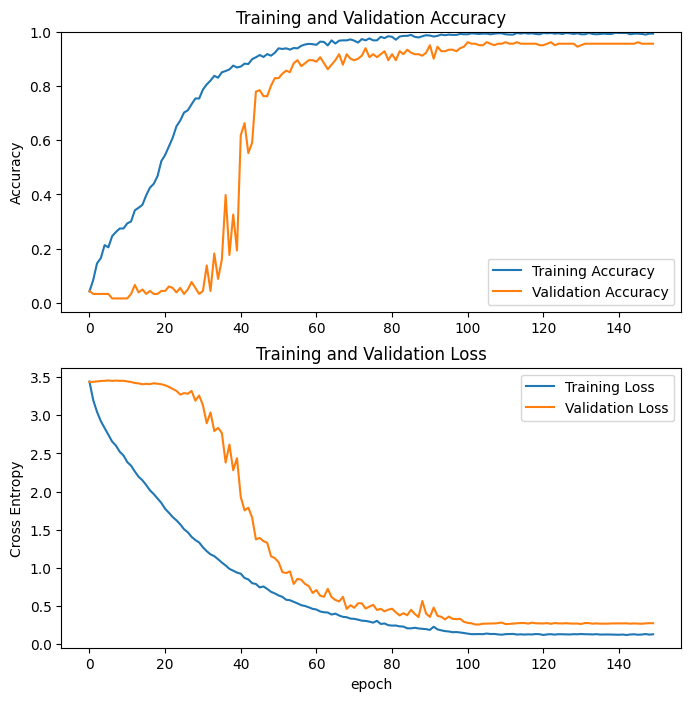

In [34]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

In [36]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [37]:
#train for another 50 epochs
epochs = 50

history3 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


14/14 [==============================] - 15s 864ms/step - loss: 0.1196 - accuracy: 0.9953 - val_loss: 0.2695 - val_accuracy: 0.9558
Epoch 2/50
14/14 [==============================] - 12s 832ms/step - loss: 0.1192 - accuracy: 0.9929 - val_loss: 0.2685 - val_accuracy: 0.9558
Epoch 3/50
14/14 [==============================] - 12s 850ms/step - loss: 0.1247 - accuracy: 0.9918 - val_loss: 0.2676 - val_accuracy: 0.9558
Epoch 4/50
14/14 [==============================] - 12s 829ms/step - loss: 0.1208 - accuracy: 0.9918 - val_loss: 0.2665 - val_accuracy: 0.9558
Epoch 5/50
14/14 [==============================] - 12s 851ms/step - loss: 0.1226 - accuracy: 0.9918 - val_loss: 0.2661 - val_accuracy: 0.9558
Epoch 6/50
14/14 [==============================] - 12s 838ms/step - loss: 0.1226 - accuracy: 0.9965 - val_loss: 0.2650 - val_accuracy: 0.9558
Epoch 7/50
14/14 [==============================] - 12s 832ms/step - loss: 0.1220 - accuracy: 0.9929 - val_loss: 0.2658 - val_accuracy: 0.9558
Epoch 8/50

In [38]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

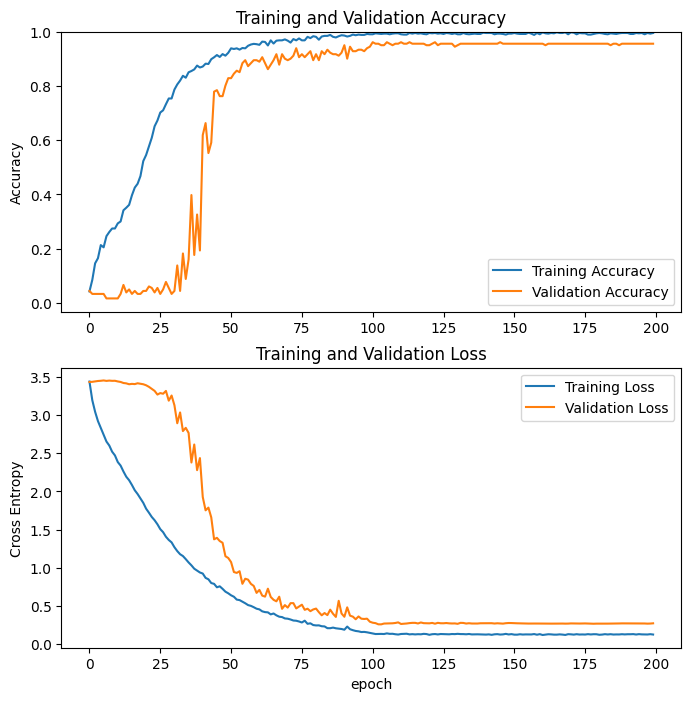

In [39]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
cnn_model = keras.models.load_model("models/testing/cnn_model.keras", compile=True)

In [40]:
results = cnn_model.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 21ms/step - loss: 0.2222 - accuracy: 0.9669
test loss, test acc: [0.22219029068946838, 0.9668508172035217]


In [41]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 0s 52ms/step


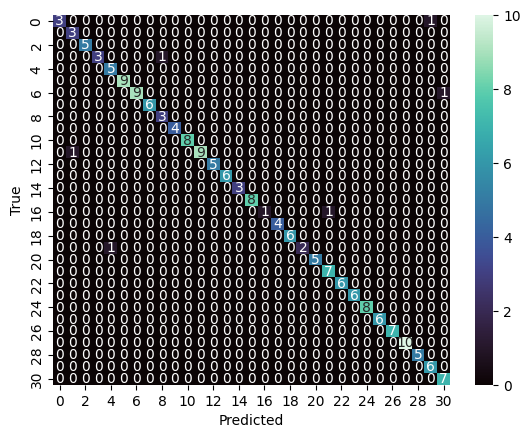

In [42]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

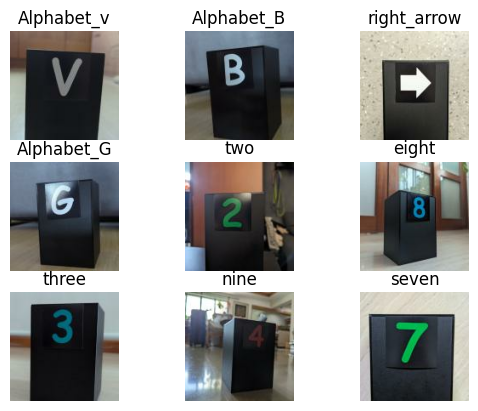

In [43]:
images, labels = next(iter(test_dataset))
preds = cnn_model(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [59]:
#cnn_model.save("./models/testing/cnn_model.keras")

#### depthwise convolution

In [17]:
img_shape = (128, 128, 3,)

In [18]:
cnn_model_dw = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.SeparableConv2D(16, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(32, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(64, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [19]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [20]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [21]:
cnn_model_dw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 separable_conv2d (Separable  (None, 126, 126, 16)     91        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 61, 61, 32)       688       
 leConv2D)                                            

In [22]:
checkpoint_filepath = 'models/testing/cnn_model_dw.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [23]:
epochs = 100

history = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100
14/14 [==============================] - 29s 2s/step - loss: 3.5526 - accuracy: 0.0294 - val_loss: 3.4337 - val_accuracy: 0.0331
Epoch 2/100
14/14 [==============================] - 12s 889ms/step - loss: 3.4139 - accuracy: 0.0506 - val_loss: 3.4339 - val_accuracy: 0.0221
Epoch 3/100
14/14 [==============================] - 13s 901ms/step - loss: 3.3638 - accuracy: 0.0742 - val_loss: 3.4342 - val_accuracy: 0.0221
Epoch 4/100
14/14 [==============================] - 12s 878ms/step - loss: 3.3188 - accuracy: 0.0860 - val_loss: 3.4346 - val_accuracy: 0.0221
Epoch 5/100
14/14 [==============================] - 12s 864ms/step - loss: 3.2809 - accuracy: 0.1060 - val_loss: 3.4352 - val_accuracy: 0.0221
Epoch 6/100
14/14 [==============================] - 12s 866ms/step - loss: 3.2392 - accuracy: 0.1119 - val_loss: 3.4362 - val_accuracy: 0.0221
Epoch 7/100
14/14 [==============================] - 12s 875ms/step - loss: 3.1757 - accuracy: 0.1272 - val_loss: 3.4374 - val_accuracy: 0.

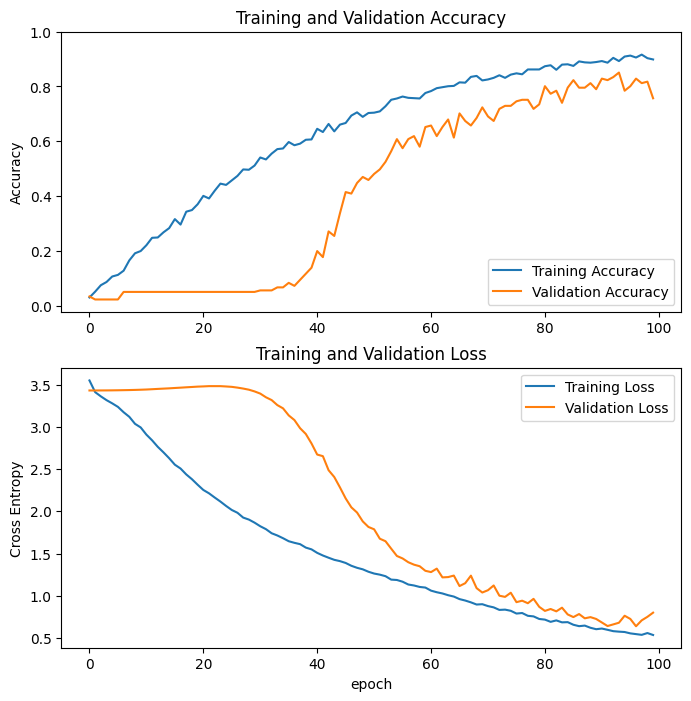

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
#decrease learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [26]:
#train for another 50 epochs
epochs = 50

history1 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


14/14 [==============================] - 17s 942ms/step - loss: 0.5160 - accuracy: 0.9117 - val_loss: 0.6867 - val_accuracy: 0.8122
Epoch 2/50
14/14 [==============================] - 13s 932ms/step - loss: 0.5023 - accuracy: 0.9223 - val_loss: 0.6690 - val_accuracy: 0.8122
Epoch 3/50
14/14 [==============================] - 12s 871ms/step - loss: 0.5016 - accuracy: 0.9199 - val_loss: 0.6424 - val_accuracy: 0.8122
Epoch 4/50
14/14 [==============================] - 13s 954ms/step - loss: 0.5002 - accuracy: 0.9140 - val_loss: 0.6246 - val_accuracy: 0.8177
Epoch 5/50
14/14 [==============================] - 14s 995ms/step - loss: 0.4918 - accuracy: 0.9164 - val_loss: 0.6054 - val_accuracy: 0.8343
Epoch 6/50
14/14 [==============================] - 14s 961ms/step - loss: 0.4941 - accuracy: 0.9234 - val_loss: 0.5886 - val_accuracy: 0.8453
Epoch 7/50
14/14 [==============================] - 13s 938ms/step - loss: 0.4795 - accuracy: 0.9270 - val_loss: 0.5816 - val_accuracy: 0.8508
Epoch 8/50

In [27]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

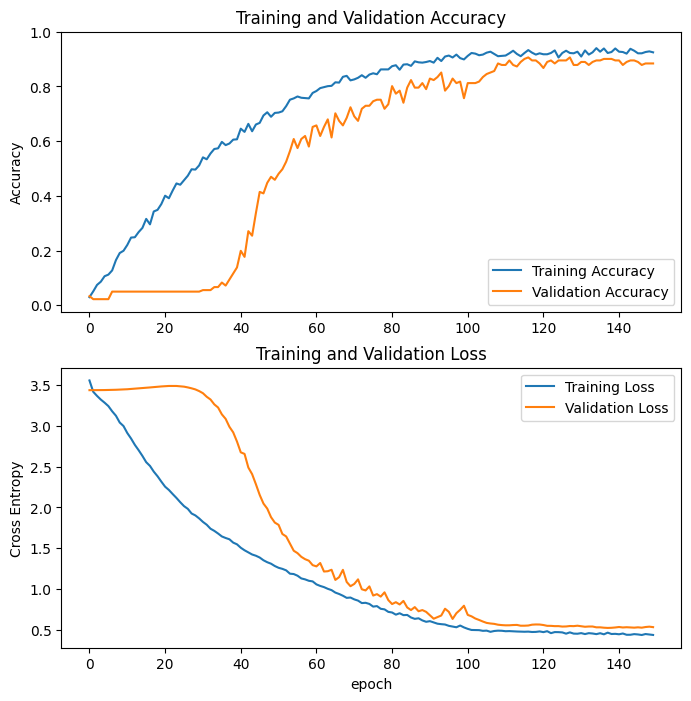

In [28]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

In [31]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [32]:
#train for another 50 epochs
epochs = 50

history2 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


14/14 [==============================] - 18s 947ms/step - loss: 0.4421 - accuracy: 0.9364 - val_loss: 0.5313 - val_accuracy: 0.8729
Epoch 2/50
14/14 [==============================] - 13s 922ms/step - loss: 0.4378 - accuracy: 0.9352 - val_loss: 0.5277 - val_accuracy: 0.8840
Epoch 3/50
14/14 [==============================] - 13s 892ms/step - loss: 0.4377 - accuracy: 0.9317 - val_loss: 0.5287 - val_accuracy: 0.8785
Epoch 4/50
14/14 [==============================] - 12s 858ms/step - loss: 0.4423 - accuracy: 0.9376 - val_loss: 0.5339 - val_accuracy: 0.8729
Epoch 5/50
14/14 [==============================] - 12s 873ms/step - loss: 0.4429 - accuracy: 0.9317 - val_loss: 0.5332 - val_accuracy: 0.8840
Epoch 6/50
14/14 [==============================] - 12s 870ms/step - loss: 0.4406 - accuracy: 0.9234 - val_loss: 0.5326 - val_accuracy: 0.8785
Epoch 7/50
14/14 [==============================] - 12s 869ms/step - loss: 0.4350 - accuracy: 0.9305 - val_loss: 0.5328 - val_accuracy: 0.8729
Epoch 8/50

In [33]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

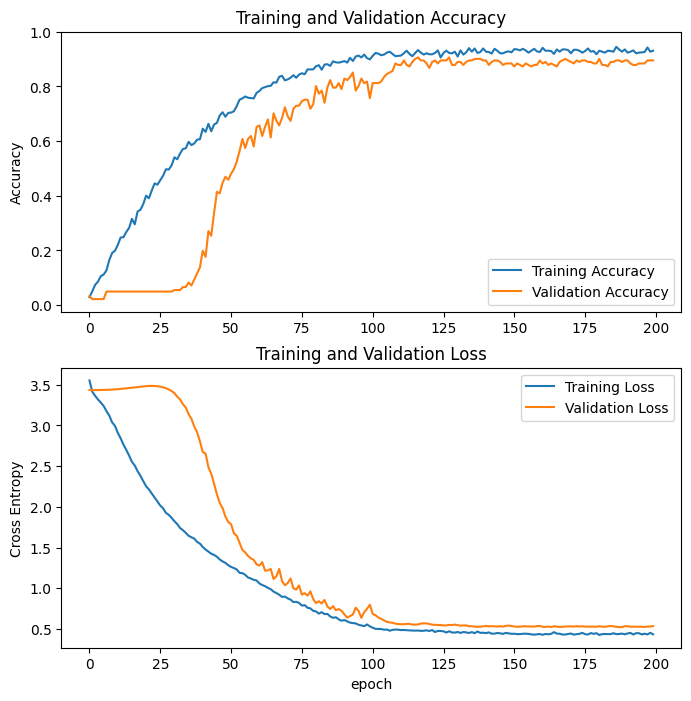

In [34]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
cnn_model_dw = keras.models.load_model("models/testing/cnn_model_dw.keras", compile=True)

In [39]:
results = cnn_model_dw.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 20ms/step - loss: 0.4881 - accuracy: 0.8840
test loss, test acc: [0.4880571663379669, 0.8839778900146484]


In [40]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model_dw.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 0s 2ms/step


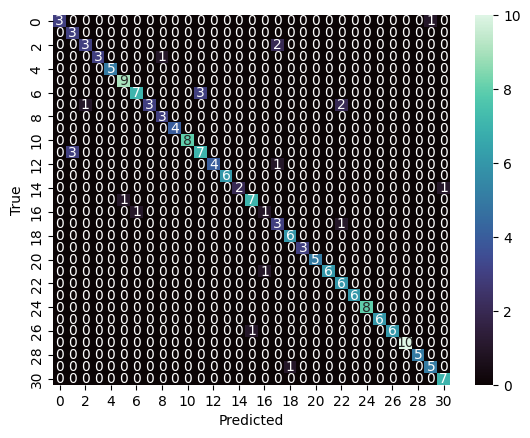

In [41]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

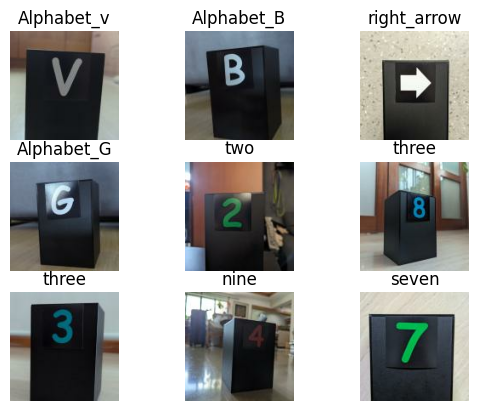

In [43]:
images, labels = next(iter(test_dataset))
preds = cnn_model_dw(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [41]:
#cnn_model_dw.save("./models/testing/cnn_model_dw.keras")

### Finetune pretrained model

In [44]:
img_shape = (128, 128, 3)

In [45]:
mobnetv3 = keras.applications.MobileNetV3Small(
  input_shape=img_shape,
  classes=len(classes),
  include_top=False,
  weights='imagenet',
  pooling=None,
  include_preprocessing=True
)

In [46]:
mobnetv3.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 64, 64, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 64, 64, 16)  64          ['Conv[0][0]']    

In [47]:
len(mobnetv3.layers)

229

In [48]:
for layer in mobnetv3.layers:
    layer.trainable = True

In [49]:
mobnetv3_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  mobnetv3,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [50]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = mobnetv3_ft(image_batch)
print(feature_batch.shape)

(64, 31)


In [51]:
mobnetv3_ft.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 4, 4, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 31)               

In [52]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [53]:
mobnetv3_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
checkpoint_filepath = 'models/testing/mobnetv3_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [55]:
epochs = 50

history_mobnet = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


14/14 [==============================] - 26s 1s/step - loss: 3.9592 - accuracy: 0.0353 - val_loss: 3.7840 - val_accuracy: 0.0552
Epoch 2/50
14/14 [==============================] - 18s 1s/step - loss: 3.6273 - accuracy: 0.0448 - val_loss: 3.6594 - val_accuracy: 0.0442
Epoch 3/50
14/14 [==============================] - 17s 1s/step - loss: 3.4758 - accuracy: 0.0624 - val_loss: 3.5597 - val_accuracy: 0.0552
Epoch 4/50
14/14 [==============================] - 17s 1s/step - loss: 3.2538 - accuracy: 0.1084 - val_loss: 3.4684 - val_accuracy: 0.0608
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 3.1178 - accuracy: 0.1355 - val_loss: 3.3775 - val_accuracy: 0.0718
Epoch 6/50
14/14 [==============================] - 18s 1s/step - loss: 2.9957 - accuracy: 0.1731 - val_loss: 3.2780 - val_accuracy: 0.0829
Epoch 7/50
14/14 [==============================] - 19s 1s/step - loss: 2.8468 - accuracy: 0.1967 - val_loss: 3.1639 - val_accuracy: 0.1271
Epoch 8/50
14/14 [=============

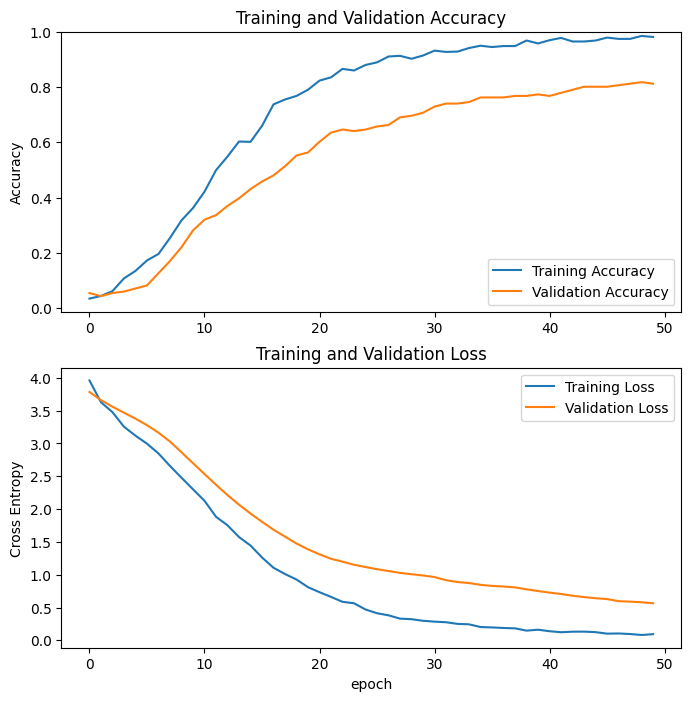

In [56]:
acc = history_mobnet.history['accuracy']
val_acc = history_mobnet.history['val_accuracy']

loss = history_mobnet.history['loss']
val_loss = history_mobnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [57]:
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [58]:
mobnetv3_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
#train for another 50 epochs
epochs = 50

history_mobnet1 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


14/14 [==============================] - 23s 1s/step - loss: 0.0774 - accuracy: 0.9870 - val_loss: 0.5548 - val_accuracy: 0.8122
Epoch 2/50
14/14 [==============================] - 17s 1s/step - loss: 0.0814 - accuracy: 0.9835 - val_loss: 0.5435 - val_accuracy: 0.8232
Epoch 3/50
14/14 [==============================] - 17s 1s/step - loss: 0.0867 - accuracy: 0.9800 - val_loss: 0.5336 - val_accuracy: 0.8232
Epoch 4/50
14/14 [==============================] - 18s 1s/step - loss: 0.0770 - accuracy: 0.9847 - val_loss: 0.5243 - val_accuracy: 0.8232
Epoch 5/50
14/14 [==============================] - 16s 1s/step - loss: 0.0786 - accuracy: 0.9859 - val_loss: 0.5152 - val_accuracy: 0.8232
Epoch 6/50
14/14 [==============================] - 17s 1s/step - loss: 0.0738 - accuracy: 0.9847 - val_loss: 0.5061 - val_accuracy: 0.8287
Epoch 7/50
14/14 [==============================] - 17s 1s/step - loss: 0.0788 - accuracy: 0.9823 - val_loss: 0.4971 - val_accuracy: 0.8343
Epoch 8/50
14/14 [=============

In [60]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

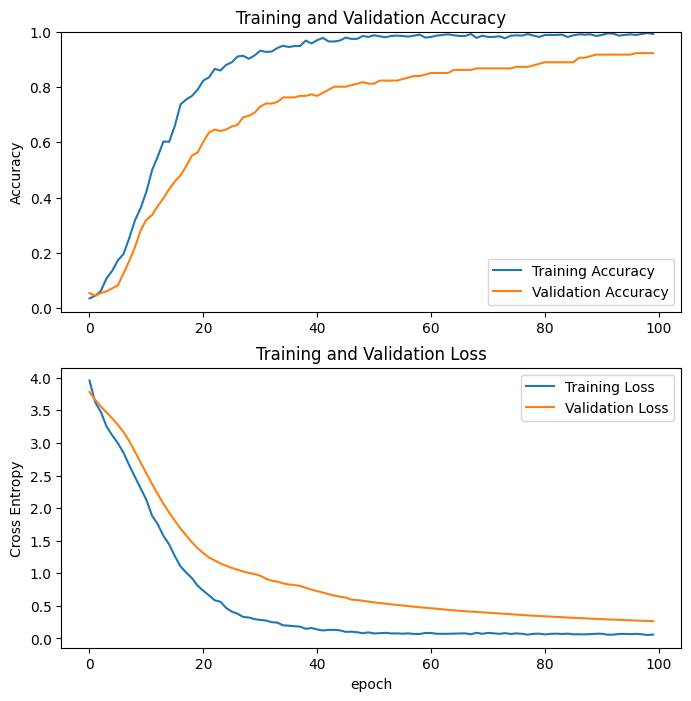

In [61]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [62]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

mobnetv3_ft.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [63]:
#train for another 50 epochs
epochs = 50

history_mobnet2 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50
14/14 [==============================] - 24s 1s/step - loss: 0.0711 - accuracy: 0.9870 - val_loss: 0.2640 - val_accuracy: 0.9227
Epoch 2/50
14/14 [==============================] - 17s 1s/step - loss: 0.0617 - accuracy: 0.9859 - val_loss: 0.2621 - val_accuracy: 0.9227
Epoch 3/50
14/14 [==============================] - 16s 1s/step - loss: 0.0650 - accuracy: 0.9847 - val_loss: 0.2595 - val_accuracy: 0.9227
Epoch 4/50
14/14 [==============================] - 16s 1s/step - loss: 0.0689 - accuracy: 0.9835 - val_loss: 0.2571 - val_accuracy: 0.9227
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 0.0634 - accuracy: 0.9918 - val_loss: 0.2553 - val_accuracy: 0.9227
Epoch 6/50
14/14 [==============================] - 17s 1s/step - loss: 0.0621 - accuracy: 0.9906 - val_loss: 0.2533 - val_accuracy: 0.9171
Epoch 7/50
14/14 [==============================] - 17s 1s/step - loss: 0.0584 - accuracy: 0.9918 - val_loss: 0.2511 - val_accuracy: 0.9171
Epoch 8/50
14/14 [==

In [64]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history, history_mobnet2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

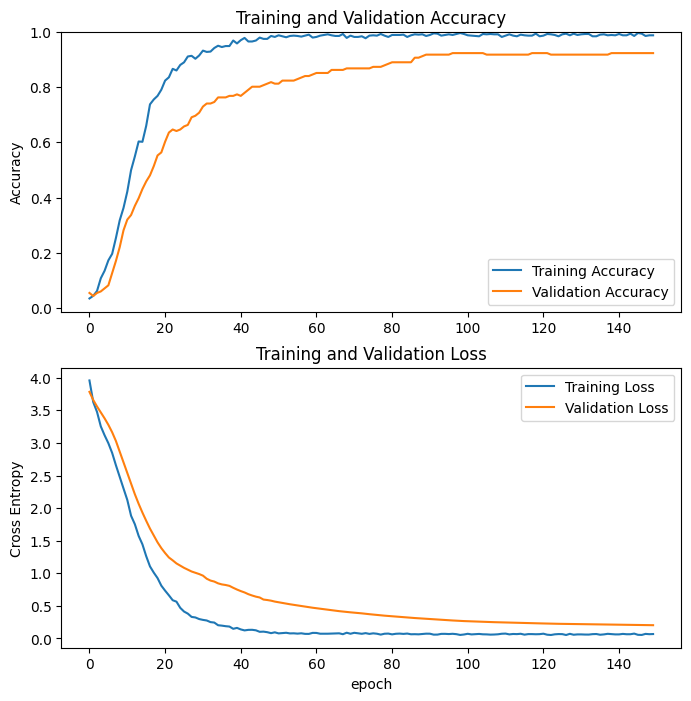

In [65]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [66]:
#train for another 50 epochs
epochs = 50

history_mobnet3 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50
14/14 [==============================] - 16s 1s/step - loss: 0.0641 - accuracy: 0.9894 - val_loss: 0.2024 - val_accuracy: 0.9227
Epoch 2/50
14/14 [==============================] - 18s 1s/step - loss: 0.0690 - accuracy: 0.9847 - val_loss: 0.2019 - val_accuracy: 0.9227
Epoch 3/50
14/14 [==============================] - 16s 1s/step - loss: 0.0621 - accuracy: 0.9906 - val_loss: 0.2011 - val_accuracy: 0.9227
Epoch 4/50
14/14 [==============================] - 17s 1s/step - loss: 0.0622 - accuracy: 0.9906 - val_loss: 0.2006 - val_accuracy: 0.9227
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 0.0717 - accuracy: 0.9800 - val_loss: 0.2001 - val_accuracy: 0.9282
Epoch 6/50
14/14 [==============================] - 16s 1s/step - loss: 0.0709 - accuracy: 0.9870 - val_loss: 0.1995 - val_accuracy: 0.9282
Epoch 7/50
14/14 [==============================] - 17s 1s/step - loss: 0.0634 - accuracy: 0.9847 - val_loss: 0.1990 - val_accuracy: 0.9282
Epoch 8/50
14/14 [==

In [67]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history, history_mobnet2.history, history_mobnet3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

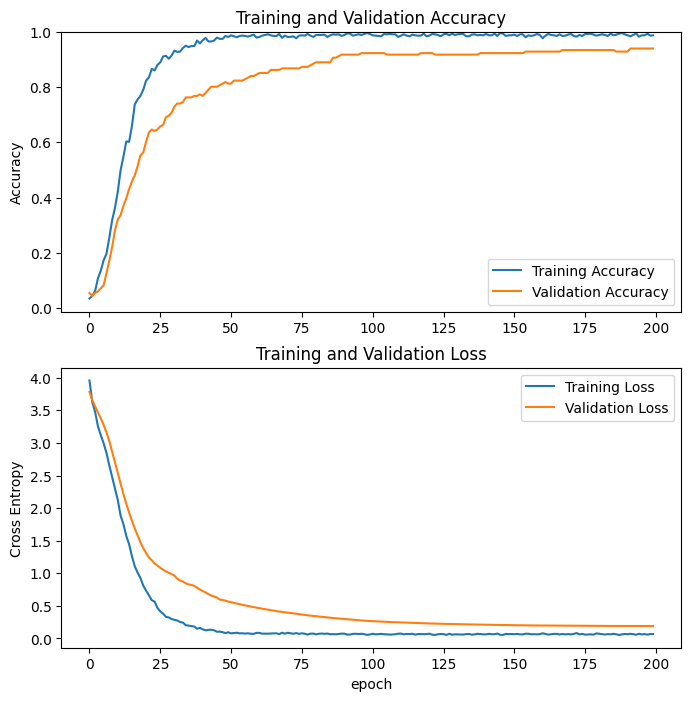

In [68]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [69]:
mobnetv3_ft = keras.models.load_model("models/testing/mobnetv3_ft.keras", compile=True)

In [71]:
loss, accuracy = mobnetv3_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 27ms/step - loss: 0.2030 - accuracy: 0.9282
Test accuracy : 0.9281768202781677


In [72]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = mobnetv3_ft.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 1s 13ms/step


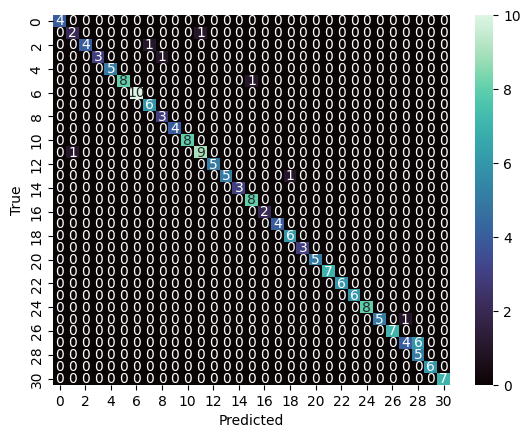

In [73]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

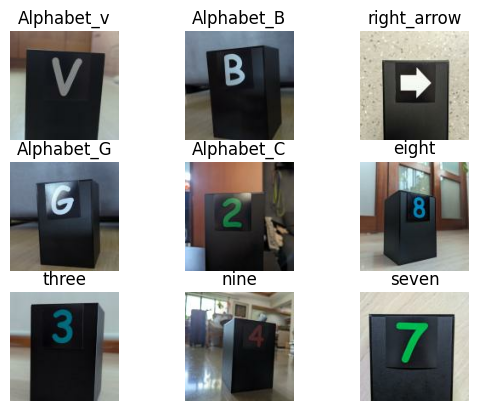

In [74]:
images, labels = next(iter(test_dataset))
preds = mobnetv3_ft(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [105]:
#mobnetv3_ft.save("./models/testing/mobnetv3_ft.keras")

##### effnet

In [84]:
effnetv2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    include_preprocessing=True
)

In [85]:
effnetv2.trainable = True

In [86]:
effnetv2.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 128, 128, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 128, 128, 3)  0          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                  

In [87]:
effnetv2_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  effnetv2,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [88]:
effnetv2_ft.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 4, 4, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 31)               

In [89]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [90]:
effnetv2_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
checkpoint_filepath = 'models/testing/effnetv2_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [92]:
epochs = 25

history_effnet = effnetv2_ft.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/25


14/14 [==============================] - 34s 2s/step - loss: 3.4954 - accuracy: 0.0400 - val_loss: 3.3761 - val_accuracy: 0.0884
Epoch 2/25
14/14 [==============================] - 25s 2s/step - loss: 3.2517 - accuracy: 0.1178 - val_loss: 3.2271 - val_accuracy: 0.1547
Epoch 3/25
14/14 [==============================] - 23s 2s/step - loss: 2.9549 - accuracy: 0.2509 - val_loss: 2.8960 - val_accuracy: 0.3481
Epoch 4/25
14/14 [==============================] - 26s 2s/step - loss: 2.5719 - accuracy: 0.4853 - val_loss: 2.4615 - val_accuracy: 0.4641
Epoch 5/25
14/14 [==============================] - 25s 2s/step - loss: 2.1035 - accuracy: 0.6125 - val_loss: 2.0107 - val_accuracy: 0.6188
Epoch 6/25
14/14 [==============================] - 21s 2s/step - loss: 1.6223 - accuracy: 0.7585 - val_loss: 1.5880 - val_accuracy: 0.7569
Epoch 7/25
14/14 [==============================] - 25s 2s/step - loss: 1.2155 - accuracy: 0.8269 - val_loss: 1.1970 - val_accuracy: 0.8232
Epoch 8/25
14/14 [=============

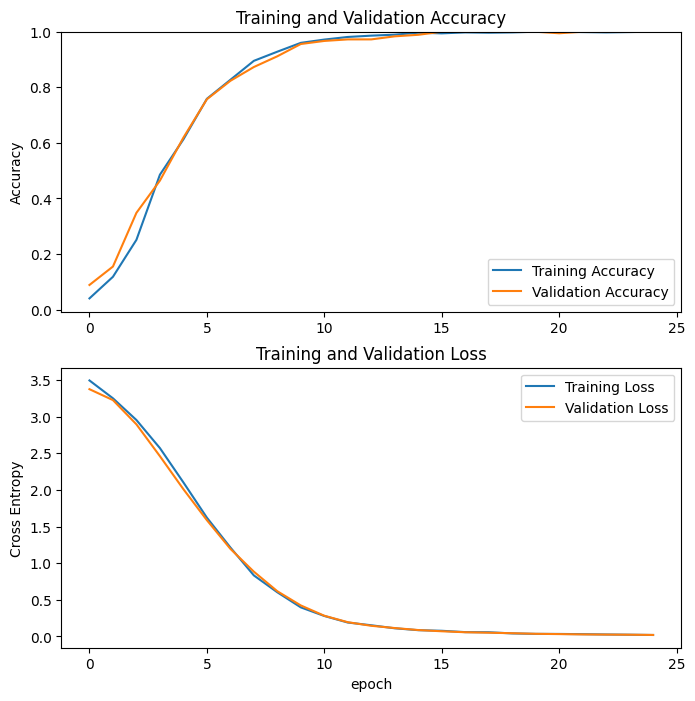

In [93]:
acc = history_effnet.history['accuracy']
val_acc = history_effnet.history['val_accuracy']

loss = history_effnet.history['loss']
val_loss = history_effnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [94]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

effnetv2_ft.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [95]:
epochs = 25

history_effnet1 = effnetv2_ft.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/25


14/14 [==============================] - 34s 2s/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 2/25
14/14 [==============================] - 15s 1s/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 3/25
14/14 [==============================] - 22s 2s/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 4/25
14/14 [==============================] - 14s 977ms/step - loss: 0.0226 - accuracy: 0.9976 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 5/25
14/14 [==============================] - 23s 2s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 6/25
14/14 [==============================] - 22s 2s/step - loss: 0.0205 - accuracy: 0.9976 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 7/25
14/14 [==============================] - 23s 2s/step - loss: 0.0232 - accuracy: 0.9988 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 8/25
14/14 [==========

In [96]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_effnet.history, history_effnet1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

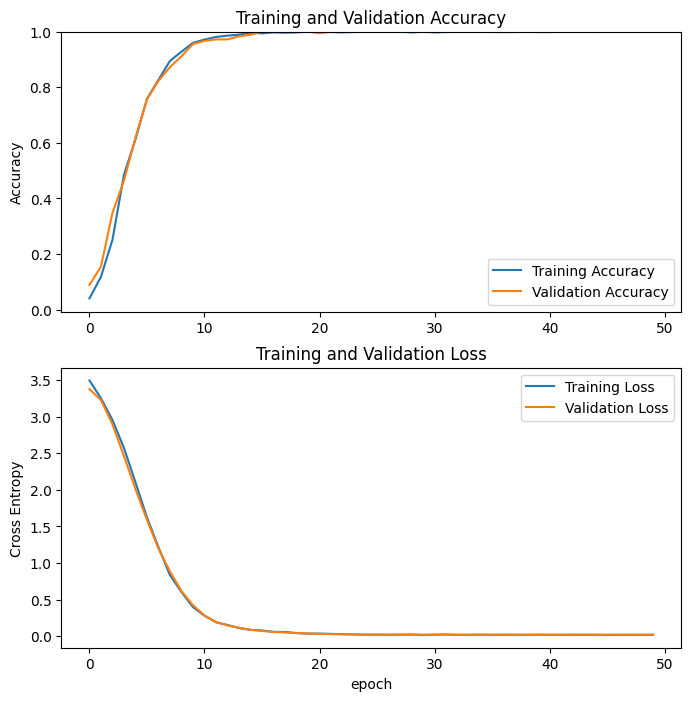

In [99]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [100]:
effnetv2_ft = keras.models.load_model("models/testing/effnetv2_ft.keras", compile=True)

In [105]:
loss, accuracy = effnetv2_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 42ms/step - loss: 0.0156 - accuracy: 1.0000
Test accuracy : 1.0


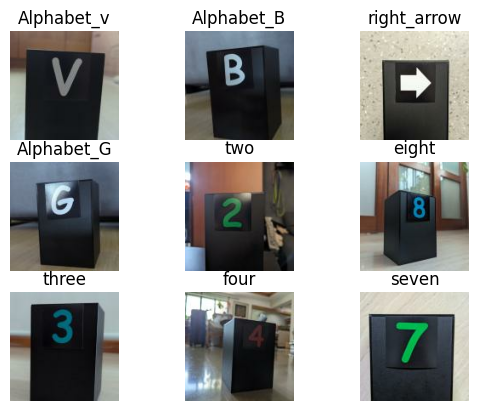

In [102]:
images, labels = next(iter(test_dataset))
preds_logits = effnetv2_ft(images)
preds = tf.math.argmax(preds_logits, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [87]:
#effnetv2_ft.save("./models/testing/effnetv2_ft.keras")